In [1]:
from sklearn.pipeline import Pipeline
# creating pipeline and fitting it on data
    
# Importing Linear Regression
from sklearn.linear_model import LinearRegression,Ridge,Lasso    
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor
from sklearn.multioutput import MultiOutputRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import MinMaxScaler

In [2]:
# import package

import matplotlib.pyplot as plt
import seaborn as sns 
import statsmodels as sm
import folium as fl
from pathlib import Path
from sklearn.impute import SimpleImputer
import geopandas as gpd
import mapclassify as mpc
import warnings
import cufflinks
import pandas as pd
import numpy as np
from sklearn.model_selection import RandomizedSearchCV, train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error

In [3]:
%matplotlib inline
#pd.options.plotting.backend
pd.plotting.register_matplotlib_converters()
gpd.plotting.plot_linestring_collection
sns.set()
warnings.filterwarnings('ignore')

In [4]:
covidfile = r'C:\Users\Hp\Documents\dataset\kaggle\corona visualization\a1\novel-corona-virus-2019-dataset (2)\covid_19_data.csv'

In [5]:
covid19 = pd.read_csv(covidfile, parse_dates=True)

In [6]:
covid19.tail()

,SNo,ObservationDate,Province/State,Country/Region,Last Update,Confirmed,Deaths,Recovered
22184,22185,05/06/2020,Wyoming,US,2020-05-07 02:32:28,631.0,7.0,0.0
22185,22186,05/06/2020,Xinjiang,Mainland China,2020-05-07 02:32:28,76.0,3.0,73.0
22186,22187,05/06/2020,Yukon,Canada,2020-05-07 02:32:28,11.0,0.0,0.0
22187,22188,05/06/2020,Yunnan,Mainland China,2020-05-07 02:32:28,185.0,2.0,181.0
22188,22189,05/06/2020,Zhejiang,Mainland China,2020-05-07 02:32:28,1268.0,1.0,1267.0


**Cleaning data**

In [7]:
covid19.isnull().sum()[covid19.isnull().sum()>0]

Province/State    11463
dtype: int64

In [8]:
covid19.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22189 entries, 0 to 22188
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   SNo              22189 non-null  int64  
 1   ObservationDate  22189 non-null  object 
 2   Province/State   10726 non-null  object 
 3   Country/Region   22189 non-null  object 
 4   Last Update      22189 non-null  object 
 5   Confirmed        22189 non-null  float64
 6   Deaths           22189 non-null  float64
 7   Recovered        22189 non-null  float64
dtypes: float64(3), int64(1), object(4)
memory usage: 1.4+ MB


In [9]:
covid19['ObservationDate'] = pd.DataFrame(covid19['ObservationDate'])
covid19['currentCase'] = covid19['Confirmed'] - covid19['Recovered'] - covid19['Deaths']

In [10]:
replace = ['Dem. Rep. Congo', "Côte d'Ivoire", 'Congo', 'United Kingdom', 'China','Central African Rep.',
          'Eq. Guinea','eSwatini','Bosnia and Herz.', 'S. Sudan', 'Dominican Rep.', 'W. Sahara',
          'United States of America']

name = ['Congo (Kinshasa)', 'Ivory Coast', 'Congo (Brazzaville)', 'UK', 'Mainland China', 
        'Central African Republic', 'Equatorial Guinea', 'Eswatini', 'Bosnia and Herzegovina', 'South Sudan',
       'Dominica', 'Western Sahara','US']

In [11]:
covid_data = covid19.drop(columns=['Province/State'])
covid_data = covid_data.replace(to_replace=name, value=replace)
#END Cleaning

In [12]:
covid_data.tail()

,SNo,ObservationDate,Country/Region,Last Update,Confirmed,Deaths,Recovered,currentCase
22184,22185,05/06/2020,United States of America,2020-05-07 02:32:28,631.0,7.0,0.0,624.0
22185,22186,05/06/2020,China,2020-05-07 02:32:28,76.0,3.0,73.0,0.0
22186,22187,05/06/2020,Canada,2020-05-07 02:32:28,11.0,0.0,0.0,11.0
22187,22188,05/06/2020,China,2020-05-07 02:32:28,185.0,2.0,181.0,2.0
22188,22189,05/06/2020,China,2020-05-07 02:32:28,1268.0,1.0,1267.0,0.0


In [13]:
kmerCovid = covid_data[covid19['Country/Region'] == 'Nigeria']
Nigeria = kmerCovid[['ObservationDate', 'Confirmed', 'Deaths', 'Recovered','currentCase']]

# Covid 19 visualizing and types of mitigation across country (Economic impact of the virus and Public health mitigations

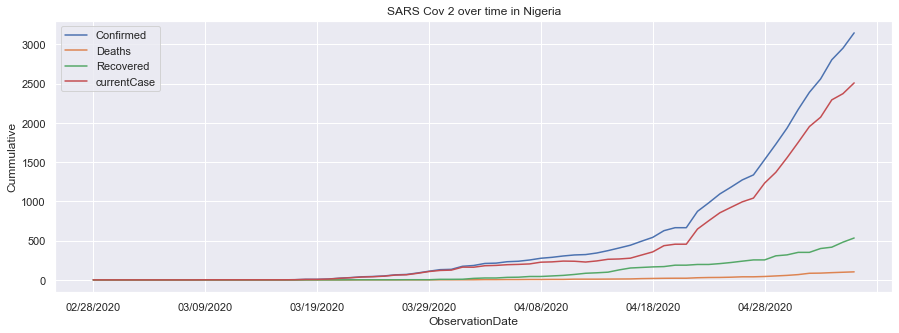

In [14]:
Nigeria.plot(x='ObservationDate',figsize=(15,5), title='SARS Cov 2 over time in Nigeria')
plt.ylabel('Cummulative')
plt.savefig('SARS Cov 2 over time in Nigeria.png')

In [15]:
print('========= COVID-19 Nigeria ==============================')
print("======== Daily report {} ===============\n".format(Nigeria.ObservationDate.max()))
print('1- Total Confirmed: {}'.format(Nigeria['Confirmed'][Nigeria.ObservationDate == Nigeria.ObservationDate.max()].values[-1]))
print('2- Total Deaths: {}'.format(Nigeria['Deaths'][Nigeria.ObservationDate == Nigeria.ObservationDate.max()].values[-1]))
print('3- Total Recovered: {}'.format(Nigeria['Recovered'][Nigeria.ObservationDate == Nigeria.ObservationDate.max()].values[-1]))
print('4- Total CurrentCase: {}'.format(Nigeria['currentCase'][Nigeria.ObservationDate == Nigeria.ObservationDate.max()].values[-1]))
print('============================================================')

========= COVID-19 Nigeria ==============================
======== Daily report 05/06/2020 ===============

1- Total Confirmed: 3145.0
2- Total Deaths: 103.0
3- Total Recovered: 534.0
4- Total CurrentCase: 2508.0


In [16]:
daily = Nigeria[Nigeria.ObservationDate == Nigeria.ObservationDate.max()]
daily_data = daily.drop(columns='ObservationDate').copy()

In [17]:
daily_data['Deaths'] = (daily_data['Deaths']/daily_data.Confirmed)*100
daily_data['Recovered'] = (daily_data['Recovered']/daily_data.Confirmed)*100
daily_data['currentCase'] = (daily_data['currentCase']/daily_data.Confirmed)*100

In [18]:
x = daily_data.drop(columns='Confirmed')

In [19]:
Nigeria.describe()

,Confirmed,Deaths,Recovered,currentCase
count,69.000000,69.000000,69.000000,69.000000
mean,527.014493,16.217391,95.826087,414.971014
std,807.328027,26.650168,135.729722,648.429210
min,1.000000,0.000000,0.000000,1.000000
25%,2.000000,0.000000,0.000000,2.000000
50%,184.000000,2.000000,20.000000,163.000000
75%,627.000000,21.000000,170.000000,436.000000
max,3145.000000,103.000000,534.000000,2508.000000


In [20]:
Nigeria.corr()

,Confirmed,Deaths,Recovered,currentCase
Confirmed,1.000000,0.997238,0.979208,0.999097
Deaths,0.997238,1.000000,0.976053,0.996206
Recovered,0.979208,0.976053,1.000000,0.969728
currentCase,0.999097,0.996206,0.969728,1.000000


In [21]:
need_feature = ['Confirmed','currentCase','Recovered','Deaths']


In [24]:
def polyRegression(x=None, y=None, degree=1):
    """
        params: x array-like predictor
        params: y array-like target
    
    """
    scaler=MinMaxScaler()
    lr=Lasso(alpha=100)
    multi_rgr = MultiOutputRegressor(lr)
    
    Input = [('modal',multi_rgr)]
    pipe=Pipeline(Input)
    pipe.fit(x.reshape(-1, 1), y)
    #x=scaler.fit_transform()
    
    poly_pred=pipe.predict(x.reshape(-1, 1))
    
    #sorting predicted values with respect to predictor
    pred = []
    for i in range(y.shape[1]):
        sorted_zip = sorted(zip(x, poly_pred[:,i]))
        _, poly_pred1 = zip(*sorted_zip)
        pred.append(poly_pred1)
    
    
    return np.asfarray(pred).T, pipe

In [26]:
key_feat =  need_feature[0]
prediction, model = polyRegression(x=Nigeria[key_feat].values,
                                  y=Nigeria[['Deaths','Recovered','currentCase']].values, degree=7)

In [27]:
x=np.array([5000]).reshape(-1,1)
y=model.predict(x)
y

array([[ 162.7680149 ,  831.50174848, 4003.64113838]])

In [28]:
df_predict = pd.DataFrame(prediction, columns=['Deaths','Recovered','currentCase'],
                          index=Nigeria.ObservationDate)
cols = ['Recovered', 'currentCase', 'Deaths']
for c in cols:
    score = np.sqrt(mean_squared_error(Nigeria[c] ,df_predict[c]))
    print('{}: RMSE for Polynomial Regression => {}\n'.format(c, score))

Recovered: RMSE for Polynomial Regression => 27.3341390583897

currentCase: RMSE for Polynomial Regression => 27.345939404930295

Deaths: RMSE for Polynomial Regression => 1.9687739219398477



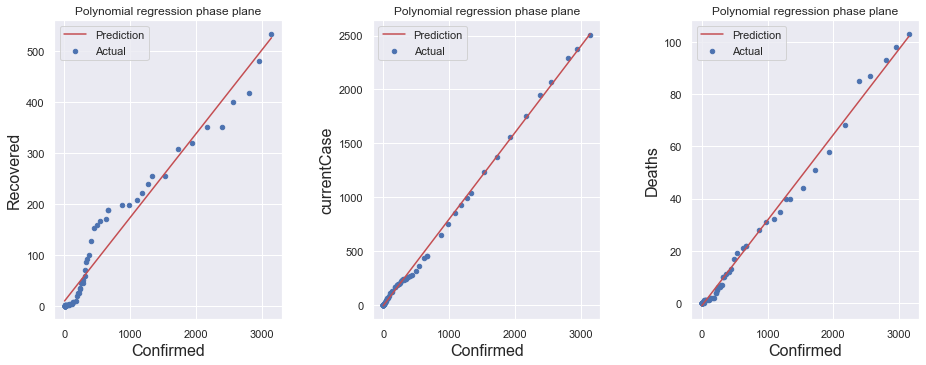

In [29]:
fig= plt.figure(figsize=(15.5,5.5))
fig.subplots_adjust(hspace=0.4, wspace=0.4)
cols = ['Recovered', 'currentCase', 'Deaths']
for i in range(1,4):
    ax=fig.add_subplot(1, 3, i)
    ax.scatter(Nigeria[key_feat], Nigeria[cols[i-1]], s=20, label='Actual')
    ax.plot(Nigeria[key_feat], df_predict[cols[i-1]] ,'r', label='Prediction')
    ax.set_xlabel(key_feat,fontsize=16)
    ax.set_ylabel(cols[i-1],fontsize=16)
    ax.legend(loc='best')
    ax.set_title('Polynomial regression phase plane')

In [30]:
cols = ['Recovered', 'currentCase', 'Deaths']
for c in cols:
    score = np.sqrt(mean_squared_error(Nigeria[c] ,df_predict[c]))
    print('{}: RMSE for Polynomial Regression => {}\n'.format(c, score))

Recovered: RMSE for Polynomial Regression => 27.3341390583897

currentCase: RMSE for Polynomial Regression => 27.345939404930295

Deaths: RMSE for Polynomial Regression => 1.9687739219398477



### See prediction

Text(0, 0.5, 'cummulative')

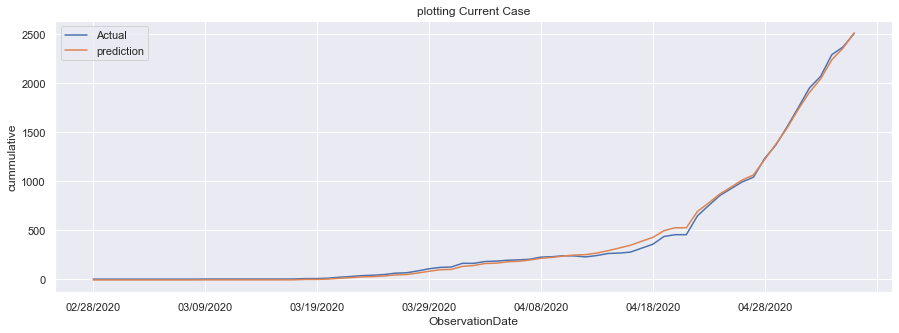

In [31]:
xplot = Nigeria.currentCase.copy()
xplot.index = Nigeria.ObservationDate
ag = xplot.plot(legend=True,label='Actual', figsize=(15,5))
df_predict.currentCase.plot(legend=True, label='prediction', ax=ag, title='plotting Current Case')
plt.ylabel('cummulative')

Text(0, 0.5, 'cummulative')

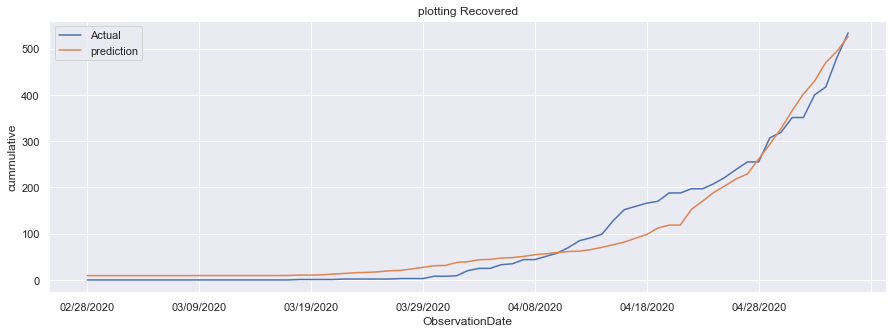

In [32]:
yplot = Nigeria.Recovered.copy()
yplot.index = Nigeria.ObservationDate
ah = yplot.plot(legend=True,label='Actual', figsize=(15,5))
df_predict.Recovered.plot(legend=True, label='prediction', ax=ah, title='plotting Recovered')
plt.ylabel('cummulative')

# Prophet model for Confirmed case

In [33]:
#importing package
from fbprophet import Prophet

In [34]:
confirm = Nigeria[['ObservationDate', key_feat]]
#confirm['Confirmed']=np.log(confirm['Confirmed']+1)

In [35]:
confirm.head(3)

,ObservationDate,Confirmed
2683,02/28/2020,1.0
2800,02/29/2020,1.0
2926,03/01/2020,1.0


In [36]:
prec = confirm.rename(columns={'ObservationDate':'ds', key_feat:'y'})

In [37]:
prec.head(3)

,ds,y
2683,02/28/2020,1.0
2800,02/29/2020,1.0
2926,03/01/2020,1.0


In [38]:
m = Prophet( daily_seasonality=True)
m.fit(prec)

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.


In [40]:
futureDays = m.make_future_dataframe(periods=90)
futureDays.head(7)

,ds
0,2020-02-28
1,2020-02-29
2,2020-03-01
3,2020-03-02
4,2020-03-03
5,2020-03-04
6,2020-03-05


In [44]:
confirmed_forecast = m.predict(futureDays)
#np.exp(confirmed_forecast)

In [45]:
confirmed_forecast=confirmed_forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']]

In [46]:
confirmed_forecast

,ds,yhat,yhat_lower,yhat_upper
0,2020-02-28,-10.006395,-79.756367,58.202384
1,2020-02-29,-10.352813,-80.843511,58.832066
2,2020-03-01,-11.845765,-80.310775,53.519608
3,2020-03-02,-13.279173,-82.667989,56.582192
4,2020-03-03,-17.825160,-88.897953,52.017005
...,...,...,...,...
154,2020-07-31,17103.493660,13944.758630,20375.155372
155,2020-08-01,17265.587401,14030.923108,20592.268047
156,2020-08-02,17426.534608,14184.584729,20845.450716
157,2020-08-03,17587.541359,14262.900553,21040.038043


Text(0.5, 1, 'Confirmed Nigeria forecasting')

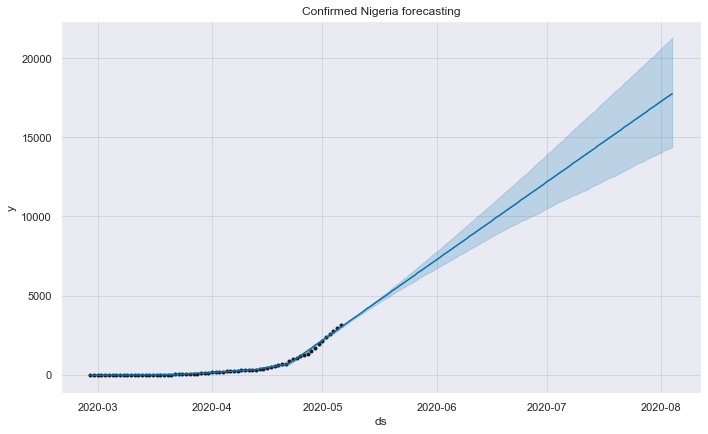

In [47]:
graph = m.plot(confirmed_forecast)
plt.title('Confirmed Nigeria forecasting')

## Validation 

In [52]:
pred_data = confirmed_forecast
#pred_data['yhat']=np.exp(pred_data['yhat'])
#pred_data['yhat_lower']=np.exp(pred_data['yhat_lower'])
#pred_data['yhat_upper']=np.exp(pred_data['yhat_upper'])


In [53]:
pforecast_lower = pd.DataFrame(model.predict(pred_data.yhat_lower.values.reshape(-1,1)), 
                               columns=['Deaths','Recovered','currentCase'],
)

In [54]:
pforecast = pd.DataFrame(model.predict(pred_data.yhat.values.reshape(-1,1)),
                         columns=['Deaths','Recovered','currentCase'],
                         index=futureDays.ds)

In [55]:
pforecast_upper = pd.DataFrame(model.predict(pred_data.yhat_upper.values.reshape(-1,1)), 
                               columns=['Deaths','Recovered','currentCase'],
                         index=futureDays.ds)

# Forecasting

In [56]:
# function for plotting
def viewing_forecast(actual=None, lower=None, forecast=None, upper=None, title=None):
    
    plt.figure(figsize=(15, 5.5))
    ax = forecast.plot(color='blue')
    
    nd = len(actual)
    time = forecast.index[:nd]
    ax.scatter(time, actual, label='Actual', color='black')
    
    ax.fill_between(forecast.index, lower, upper, alpha=0.9, color='orange')
    
    a = actual.index.to_list()
    b = actual.index.max()
    n = a.index(b)
    pmax = forecast.max()
    pmin = forecast.min()
    ax.vlines(actual.index[n], actual.min(), pmax, linestyles='dashdot', colors='black',
              label='stop actual')
    
    bbox = dict(boxstyle="round", fc='0.8')
    arrowprops = dict(arrowstyle='->', connectionstyle='angle, angleA=0, angleB=100, rad=10', 
                      facecolor='black')
    
    offset = 72
    
    ax.annotate('Actual-Prediction', (actual.index.max(), actual.max()), xytext=(-2*offset, offset), 
                textcoords='offset points', bbox=bbox, arrowprops=arrowprops)
    
    disp = ax.annotate('Forecasting', (actual.index.max(), actual.max()), xytext=(0.5*offset, -offset),
                textcoords='offset points', bbox=bbox, arrowprops=arrowprops)
    
    
    ax.set_xlabel('Date')
    ax.set_ylabel('Cumulative')
    ax.set_title('{} Nigeria Forecasting'.format(title))
    plt.legend(loc='best')  
    plt.savefig(title + '.png')

In [57]:
datac = Nigeria.set_index('ObservationDate')

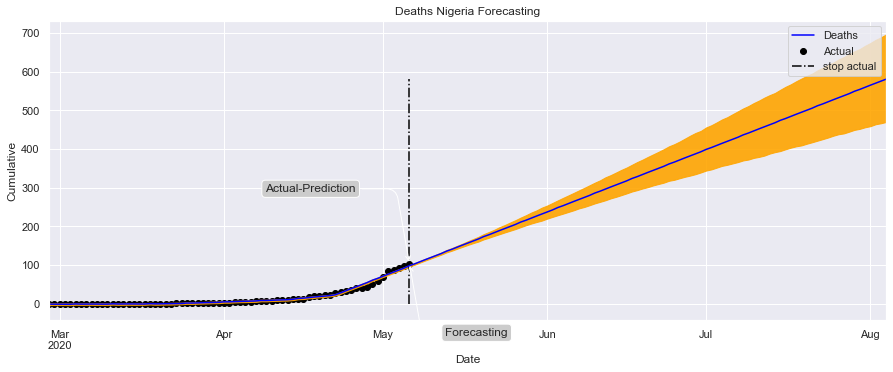

In [58]:
viewing_forecast(actual=datac['Deaths'] ,lower=pforecast_lower['Deaths'],
                 forecast=pforecast['Deaths'] , 
                 upper=pforecast_upper['Deaths'] ,
                 title='Deaths')

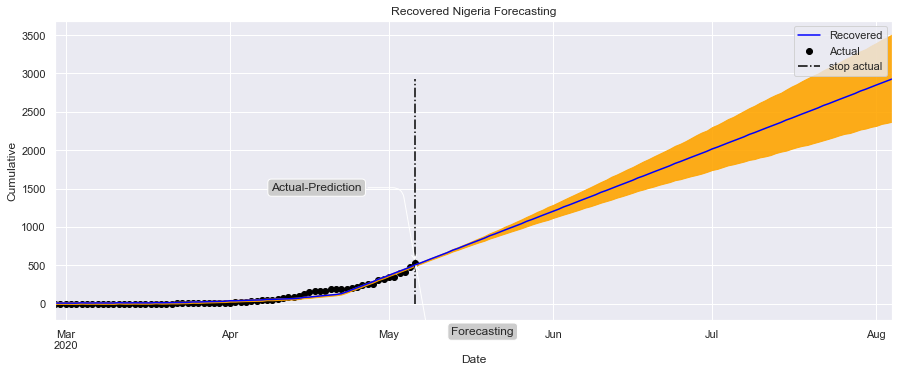

In [59]:
viewing_forecast(actual=datac['Recovered'],lower=pforecast_lower['Recovered'], 
                 forecast=pforecast['Recovered'] , 
                 upper=pforecast_upper['Recovered'] ,
                 title='Recovered')

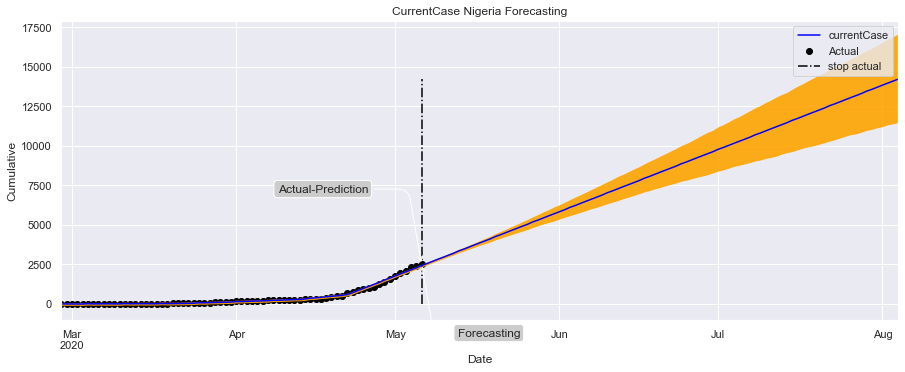

In [60]:
viewing_forecast(actual=datac['currentCase'],lower=pforecast_lower['currentCase'], 
                 forecast=pforecast['currentCase'] , 
                 upper=pforecast_upper['currentCase'] ,
                 title='CurrentCase')

In [61]:
def determinate_beta_gamma_delta(data=None):
    '''
        this function compute transmission rate, recovered rate and fatalities rate over time
        params: data
        return: beta, gamma, delta
    '''
    
    beta = []
    gamma = []
    delta = []
    
    for t in range(len(data.ObservationDate.values)):
        
        x = data.Confirmed.iloc[t]
        y = data.Deaths.iloc[t]
        z = data.Recovered.iloc[t]
        w = data.currentCase.iloc[t]
        
        if x == 0.0:
            beta.append(0)
            gamma.append(0)
            delta.append(0)
        else:
            beta_t = w/x
            gamma_t = z/x
            delta_t = y/x
            
            beta.append(beta_t)
            gamma.append(gamma_t)
            delta.append(delta_t)
            
    return np.array(beta), np.array(gamma), np.array(delta)        

In [62]:
transmission, recovery, fatality = determinate_beta_gamma_delta(data=Nigeria)

In [63]:
parameter_dynamic = pd.DataFrame()
parameter_dynamic['beta'] = transmission
parameter_dynamic['gamma'] = recovery
parameter_dynamic['delta'] = fatality
parameter_dynamic.index = Nigeria.ObservationDate

In [64]:
parameter_dynamic.head()

,beta,gamma,delta
ObservationDate,,,
02/28/2020,1.0,0.0,0.0
02/29/2020,1.0,0.0,0.0
03/01/2020,1.0,0.0,0.0
03/02/2020,1.0,0.0,0.0
03/03/2020,1.0,0.0,0.0


In [65]:
def find_R0(data=None):
    '''
        This function compute R0 over time
        params: data
        return: R0
    '''
    return data.beta.values/(data.gamma.values + data.delta.values)

In [66]:
#Compute R0
parameter_dynamic['R0'] = find_R0(data=parameter_dynamic)
print(parameter_dynamic['R0'].min())
parameter_dynamic.columns=['\u03B2', '\u03B3', '\u03B4','R0']
parameter_dynamic.columns


1.6787878787878787


Index(['β', 'γ', 'δ', 'R0'], dtype='object')

In [67]:
print('\u03B2')

β


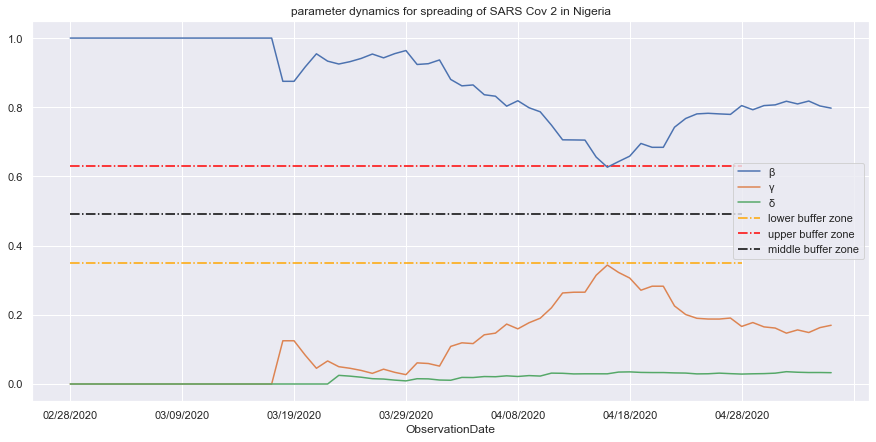

In [68]:
parameter_dynamic[['\u03B2', '\u03B3', '\u03B4']].plot(figsize=(15,7))
plt.hlines(0.35, 0, 60, linestyles='dashdot',color='orange',label='lower buffer zone')
plt.hlines(0.63, 0, 60, linestyles='dashdot',color='red', label='upper buffer zone')
plt.hlines(0.49, 0, 60, linestyles='dashdot', color='black',label='middle buffer zone')
plt.legend(loc='best')
plt.title('parameter dynamics for spreading of SARS Cov 2 in Nigeria')
plt.savefig('paramater dynamics.png')

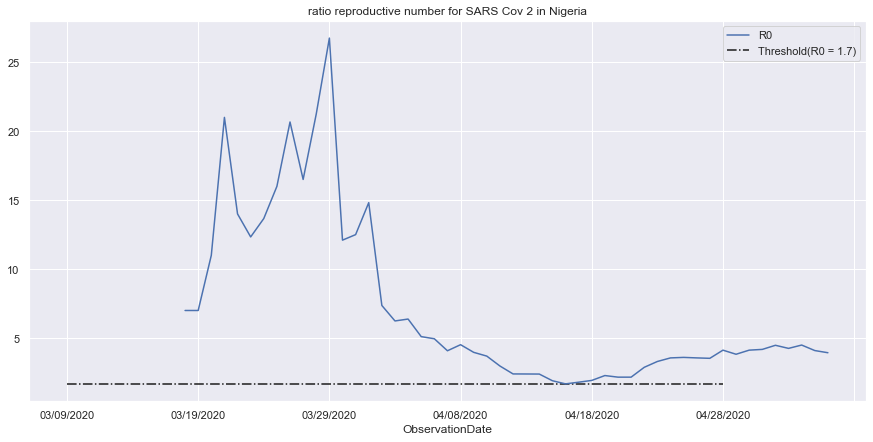

In [88]:
# Plot R0
parameter_dynamic['R0'].plot(figsize=(15,7))
plt.hlines(1.67, 10, 60, linestyles='dashdot', label='Threshold(R0 = 1.7)')
plt.legend(loc='best')
plt.title('ratio reproductive number for SARS Cov 2 in Nigeria')
plt.savefig('reproductive rate.png')

In [171]:
def growth_rate(data=None):
    """
        This function compute a growth rate of one variable
        params: data
        return: growth rate x
    
    """
    x = []
    x.append(0)
    for i in range(data.shape[0]-1):
        a = data.iloc[i+1]-data.iloc[i]
        b = a/data.iloc[i]
        x.append(b)
        
    return np.array(x)

In [172]:
growth_rate_currentCase = pd.DataFrame(growth_rate(data=Nigeria.currentCase), columns=['currentCase'],
                                       index=Nigeria.ObservationDate)

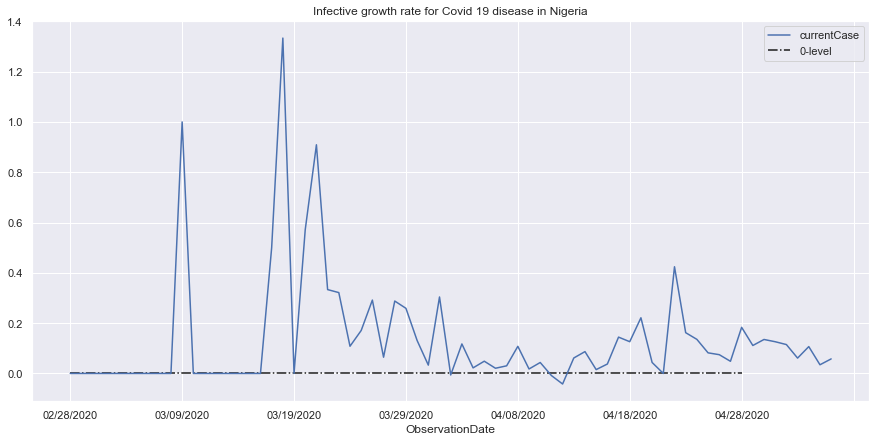

In [173]:
growth_rate_currentCase.plot(figsize=(15,7))
plt.hlines(0, 0, 60, linestyles='dashdot', label='0-level')
plt.legend(loc='best')
plt.title('Infective growth rate for Covid 19 disease in Nigeria')
plt.savefig('Growthrate.png')